# Electromagnetism Homework 1
## Caleb Young
## Due 1/23/2025
## Electromag 1 review

## Problem 1: 
Neatly sketch (or plot) the vector function $$v = \frac{\hat{\mathbf{r}}}{{r}^2}$$
and compute its divergence. The answer may surprise you... can you explain it?

### Solution: 
### Plotting the vector function: 
I will write this out as practice and as a reminder r hat is the unit vector pointing out from the origin. The 1/r^2 is the magnitude of the vector field at that point. It means that the field strength decreases with the square of the distance from the origin. So how do we express this in code? 

1. We can use numpy to handle the vector calculations and matplotlib to visualize the field. So we'll need to import those libraries into the coding block first. 

2. Following the Jupyter Notebooks guide we can calculate the vector field. We must remember that r is a radial term for distance from the origin at an angle $\theta$. This means we will have to represent the distance r with x and y components. To do this we can use this geometric equation $r = \sqrt{x^2+y^2}$. With that we can calculate $\hat{r}$ in the x and y directions using $\hat{r}_x = x / r$ and vice versa for y. Next we can take care of the magnitude of the vector field at any point using the equation we are given $mag = 1 / r^2$. Since $\hat{r} = r/r$ we can rewrite the original equation as $v = r / r^3$. Now we can use this to calculate the vector field's x and y components using $f_x = mag * \hat{r}_x$ & $f_y = mag * \hat{r}_y$. 

3. We can now start to set up the plot. First we must define the plot area. Following the guide we can use x = np.linspace(-2, 2, 20) where -2 is the left most point on the graph, 2 is the right most, and 20 is how many points or steps there are between those. The same goes for the y axis. Now we can set up the plot evironment like the guide shows. I ended up not using the guide and looked back at some stuff from deeplearning that used jupyter notebooks. I found it easier using plt.(insert thing). Had to look up some stuff and went ahead and verified if my plot was correct and it should be. 

### Computing the divergence: 
The divergence equation is as follows:    $$\nabla \cdot \vec{v} = \frac{\partial v_x}{\partial x} + \frac{\partial v_y}{\partial y} + \frac{\partial v_z}{\partial z}$$

Since we are only in 2D coordinates we can cut out the Z component:    $$\nabla \cdot \vec{v} = \frac{\partial v_x}{\partial x} + \frac{\partial v_y}{\partial y}$$

We could also do this in spherical coordinates. Looking back at my notes from ElectroMag 1:    $$\nabla \cdot \vec{v} = \frac{1}{r^2}\frac{\partial}{\partial r}\left(r^2 v_r\right) + \frac{1}{r\sin{\theta}}\frac{\partial}{\partial \theta}\left(\sin{\theta}v_\theta\right)$$

So obviously we used some cartesian math to convert the x and y components to the radial component r. Since we want to calculate the divergence about a point it would probably be better to do this in spherical coordinates. In 2D spherical coordinates the phi ($\phi$) component can be taken out of the equation. Adding to this; since the vector field is pointed radially outward there is no divergence in the $\theta$ direction. This means that we can cross out this entire part of the equation and we are left with: $$\nabla \cdot \vec{v} = \frac{1}{r^2}\frac{\partial}{\partial r}\left(r^2 v_r\right)$$


Now the equation is even more simple. We are left with one component to deal with $V_r$. This can be described by the equation we were given $\frac{1}{r^2}$. The distance from the origin or the surface area that the vector field covers can be described by $r^2$. The field strength based on the equation drops as $\frac{1}{r^2}$. We simply plug in numbers now. $$\nabla \cdot \vec{v} = \frac{1}{r^2}\frac{\partial}{\partial r}\left(r^2\frac{1}{r^2}\right)$$
This then becomes: $$\nabla \cdot \vec{v} = \frac{1}{r^2}\frac{\partial}{\partial r}\left(1\right)$$
The partial derivative with respect to r of 1 is 0. $$\frac{\partial}{\partial r}\left(1\right) = 0$$
From this we already know that anything multiplied by 0 is 0. So $$\nabla \cdot \vec{v} = \frac{1}{r^2}\frac{\partial}{\partial r}\left(r^2 v_r\right) = 0$$

Why is this the case though? My thought process is that each vector no matter its place in the 2D space has another vector in the same place opposite to it so they cancel each other out. After some research I found a nice explanation. Imagine a lightbulb in a dark room with two spheres around it. The amount of light exiting the first sphere is the same as the amount of light entering and exiting the second larger sphere. There is more surface area to cover so the light would just look more dim further away. This reminded me of flux through a plane. 

What is interesting is at the point r = 0. Here the divergence of the field is infinite. I see why this question is on the homework because this whole thing is representative of a point charge in space. Its the source of the electric field where the vector field is diverging from (even though its 0). 

This is just like the dirac delta function, but yes the divergence is 0. 

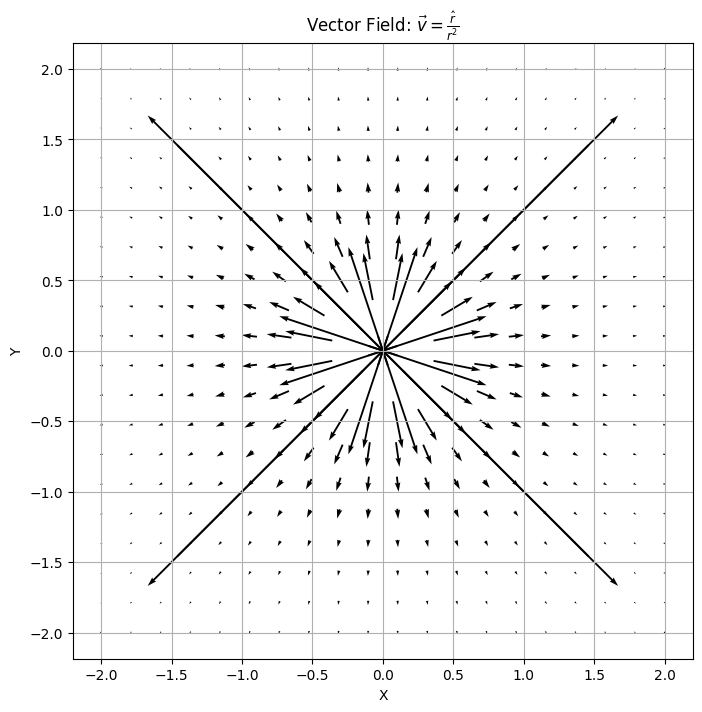

In [9]:
# Following the Intro to Jupyter Notebook tutorial: 
# first import the necessary libraries
import numpy as np
import matplotlib.pyplot as plt

# for this plot well have to express r in terms of x and y coordinates because
# r is a radial component 
# we can define the plot area and create a grid of points
x = np.linspace(-2, 2, 20) # values from -2 to 2 in 20 steps
y = np.linspace(-2, 2, 20)
X, Y = np.meshgrid(x, y) # create a mesh grid

r = np.sqrt(X**2 + Y**2) + 1e-9 # adding a small number to avoid division by zero

# now we can define the vector components based on the formula v = r_vector / r^3
U = X / r**3 # x-component
V = Y / r**3 # y-component

# now we can create the plot
plt.figure(figsize=(8, 8)) # set the figure size

# found this cool thing called quiver that plots vector field arrows
plt.quiver(X, Y, U, V, pivot='mid') # create the quiver plot

# now we can add labels and a title
plt.title(r'Vector Field: $\vec{v} = \frac{\hat{r}}{r^2}$') # title with LaTeX formatting :/ 
plt.xlabel('X') # x-axis label
plt.ylabel('Y') # y-axis label
plt.axis('equal') # equal scaling for both axes
plt.grid(True) # creates the grid lines
plt.show()

### Problem 2: [*]
In 1897 J.J. Thomson “discovered” the electron by measuring the charge-to-mass ratio of 
“cathode rays” (actually, streams of electrons with charge q and mass m) as follows:

1. First he passed the beam through uniform crossed electric and magnetic fields E and B (mutually perpendicular, both of them perpendicular to the beam), and adjusted the electric field until he got zero deflection. What, then, was the speed of the particles (in terms of E and B)?

2. Thomson apparently didn’t record the field magnitudes he used but we can make reasonable assumptions based upon the technology of the time. Assume the magnitude of the electric field is $$2 * {10}^{4}\frac{V}{m}$$ and the magnitude of the magnetic field is $$2 * {10}^{-3} T$$ Using these values what was the speed of the particles from the first part?

3. Then he turned off the electric field, and measured the radius of curvature, R, of the beam, as deflected by the magnetic field alone. In terms of E, B, and R, what is the charge-to-mass ratio (q/m) of the particles? Given the geometry the radius, R, was likely in the range 1-5 cm. Using those values and the values for the zero-deflection velocity and magnitude of the magnetic field, calculate the charge-to-mass ratio for the electron. Compare the value to a calculation using the modern accepted values of charge and mass of the electron.

4.  In this part you will numerically simulate the electron trajectory through the fields and compare against 
your analytic results above. Use the modern accepted values of charge and mass for the electron.
Geometry and initial conditions: Assume the electron enters the field region at t = 0 with position $$r(0) = x(0)\hat{x} + y(0)\hat{y} + z(0)\hat{z} = 0\hat{x} + 0\hat{y} + 0\hat{z}$$ and initial velocity $$v(0) = 0\hat{x} + 0\hat{y} + 0\hat{z}$$ (i.e., the beam initially travels along $+\hat{y}$). Choose constant fields $$E = E\hat{x}+0\hat{y}+0\hat{z} , B = 0\hat{x} + 0\hat{y} + B\hat{z}, $$
so that E is perpendicular to B and both are perpendicular to the initial beam direction. 

Equation of Motion: Use the Lorentz force law, $$m\frac{dv}{dt}=q(E+v*B), \frac{dr}{dt} = v.$$ 
Define the acceleration function: $$a(v) = \frac{q}{m}(E + v * B)$$

(Notice that for uniform $E$, $B$ the acceleration depends on $v$ but not on $r$.)

**Velocity-Verlet update.** Let the time step be $\Delta t$ and denote $r_n \approx r(t_n)$, $v_n \approx v(t_n)$ with $t_n = n\Delta t$.

Compute:

1. Set $a_n = a(v_n)$.

2. Update position:
$$r_{n+1} = r_n + v_n\Delta t + \frac{1}{2}a_n\Delta t^2$$

3. Predict a half-step velocity:
$$v_{n+\frac{1}{2}} = v_n + \frac{1}{2}a_n\Delta t$$

4. Compute $a_{n+1} = a(v_{n+\frac{1}{2}})$.

5. Correct the full-step velocity:
$$v_{n+1} = v_{n+\frac{1}{2}} + \frac{1}{2}a_{n+1}\Delta t$$

**What to simulate and plot:**

(i) **Crossed fields:** pick numerical values for $E$ and $B$ and choose
$$v_0 = \frac{E}{B}$$
(the analytic "zero deflection" speed from part (a)). Run your simulation for a time long enough that the particle would noticeably deflect if $v_0$ were incorrect. Plot the trajectory in the $x$–$y$ plane (plot $y$ vs. $x$) and verify it remains approximately a straight line.

(ii) **Crossed fields off-null:** repeat (i) with $v_0 = 0.90(E/B)$ and $v_0 = 1.10(E/B)$. Plot all three trajectories on the same figure. Describe what changes and why.

(iii) **B only:** set $E = 0$ and keep the same $B$. Run the simulation and plot $y$ vs. $x$. Estimate the radius of curvature from your numerical trajectory and compare to the analytic expression from part (b).

### Solution to Problem 2 Conceptual: 
I had to do some more digging and research to figure this out again. Then I read all the way through the problem and realized the answer to the conceptual stuff was down here fml. 

1. **************************************************************************************
$$v = \frac{E}{B}$$

2. **************************************************************************************
Assuming the magnitude of the electric field and the magnitude of the magnetic field is: $$E = 2 * {10}^{4}\frac{V}{m}$$ 
$$B = 2 * {10}^{-3} T$$
This would give us $$v = \frac{2 * {10}^{4}\frac{V}{m}}{2 * {10}^{-3} T}$$
The units end up working out if we convert E to units of F / q, and B to units of F / qv. This way the newtons and coulombs cancel and were left with m/s. After math stuff were left with $v = 10,000,000 m/s$. This is about 3% the speed of light. 

3. **************************************************************************************
Did a little digging to remember the equation for centripetal force which is $F_c = \frac{m{v^{2}}}{r}$. We can then pair this with the results of turning the electric field off. The magnetic field is the only force acting on the beam of electrons. This means that $F_c = F_B$ ---> $qvB = \frac{m{v^{2}}}{r}$. From here we can get the charge-to-mass ratio (q/m). The rearranged equation solving for q/m is: $$\frac{q}{m} = \frac{v}{Br}$$
Since we know that $v = \frac{E}{B}$, we can get ($\frac{q}{m}$) in terms of E, B, and r: 
$$\frac{q}{m} = \frac{v}{Br} = \frac{E}{r{B}^{2}}$$
Now we can plug in our values. If I understand this right im supposed to use the E and B values from the second part. I'll go ahead and use the value of 3cm or 0.03m for r. From this we get: $$\frac{q}{m} = \frac{10,000,000\frac{m}{s}}{(2 * {10}^{-3}\frac{kg*m}{{s}^{2}*C}) * 0.03m} = 1.67 * {10}^{11}\frac{C}{kg}$$
Today's accepted value for the charge-to-mass ratio is $1.7588 * {10}^{11}\frac{C}{kg}$. I wasn't too far off. Switching the numbers out for r changes the calculation by a lot so my choice to go with 0.03 m was a good idea. 

4. ****************************************************************************************
Now for the simulation of electron trajectory through the fields. Conceptual stuff will be up here in the markdown. See code in the coding cell below. 



In [ ]:
import numpy as np
import matplotlib.pyplot as plt

E = 2*10**4 # Electric field strength in V/m from part 1
B = 2*10**-3 # Magnetic field strength in T from part 1
q = 1.602*10**-19 # Charge of the particle in C
m = 9.109*10**-31 # Mass of the particle in kg
v = E / B # Velocity of the particle in m/s
r = 0.03 # Radius of the circular path in m
cmr = E / (r * B**2) # charge to mass ratio in C/kg
v1 = 0.90 * (E/B) # 90% of the velocity from part 1 in m/s
v2 = 1.10 * (E/B) # 110% of the velocity from part 1 in m/s



Simulating case (i): Crossed fields, v0 = E/B
Simulating case (ii): Crossed fields, v0 = 0.90(E/B) and 1.10(E/B)
Simulating case (iii): B field only


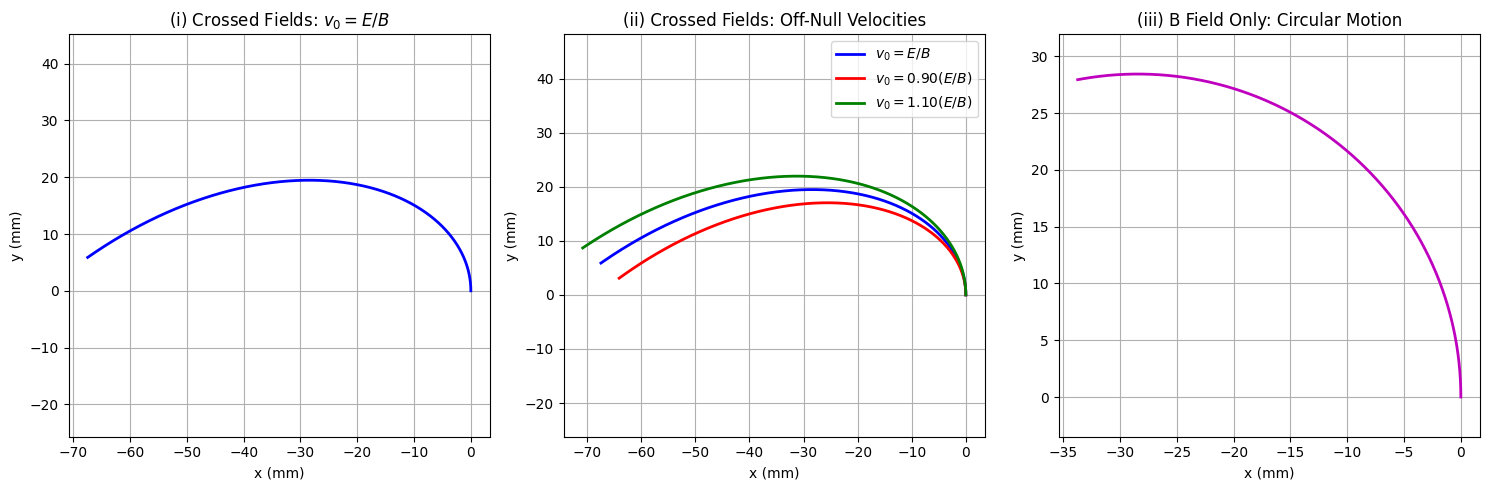


========== ANALYSIS ==========
Zero-deflection velocity: v0 = 1.000e+07 m/s
Expected radius (analytic): R = mv/(qB) = 28.433 mm
Numerical radius: R ≈ 43.799 mm


In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Constants from previous parts
E_mag = 2e4  # Electric field strength in V/m
B_mag = 2e-3  # Magnetic field strength in T
q = -1.602e-19  # Charge of electron in C (negative!)
m = 9.11e-31  # Mass of electron in kg

# Simulation parameters
dt = 1e-12  # Time step in seconds (1 picosecond)
t_max = 5e-9  # Total simulation time (5 nanoseconds)
n_steps = int(t_max / dt)

# Define the acceleration function for Lorentz force
def acceleration(v, E_vec, B_vec):
    """
    Calculate acceleration from Lorentz force: a = (q/m)(E + v × B)
    v: velocity vector [vx, vy, vz]
    E_vec: electric field vector [Ex, Ey, Ez]
    B_vec: magnetic field vector [Bx, By, Bz]
    """
    v_cross_B = np.cross(v, B_vec)
    a = (q / m) * (E_vec + v_cross_B)
    return a

# Velocity-Verlet integrator
def velocity_verlet(r0, v0, E_vec, B_vec, dt, n_steps):
    """
    Integrate electron trajectory using Velocity-Verlet method
    """
    # Initialize arrays to store trajectory
    r = np.zeros((n_steps, 3))
    v = np.zeros((n_steps, 3))
    
    r[0] = r0
    v[0] = v0
    
    for n in range(n_steps - 1):
        # Step 1: Compute acceleration at current velocity
        a_n = acceleration(v[n], E_vec, B_vec)
        
        # Step 2: Update position
        r[n+1] = r[n] + v[n] * dt + 0.5 * a_n * dt**2
        
        # Step 3: Predict half-step velocity
        v_half = v[n] + 0.5 * a_n * dt
        
        # Step 4: Compute acceleration at half-step velocity
        a_n_plus_1 = acceleration(v_half, E_vec, B_vec)
        
        # Step 5: Correct full-step velocity
        v[n+1] = v_half + 0.5 * a_n_plus_1 * dt
    
    return r, v

# Initial conditions
r0 = np.array([0.0, 0.0, 0.0])  # Starting at origin

# Field configurations
E_vec = np.array([E_mag, 0.0, 0.0])  # E field in +x direction
B_vec = np.array([0.0, 0.0, B_mag])  # B field in +z direction

# ========== (i) Crossed fields with v0 = E/B ==========
print("Simulating case (i): Crossed fields, v0 = E/B")
v0_null = E_mag / B_mag
v0_1 = np.array([0.0, v0_null, 0.0])  # Initial velocity in +y direction
r1, v1 = velocity_verlet(r0, v0_1, E_vec, B_vec, dt, n_steps)

# ========== (ii) Crossed fields off-null ==========
print("Simulating case (ii): Crossed fields, v0 = 0.90(E/B) and 1.10(E/B)")
v0_low = 0.90 * (E_mag / B_mag)
v0_high = 1.10 * (E_mag / B_mag)

v0_2 = np.array([0.0, v0_low, 0.0])
v0_3 = np.array([0.0, v0_high, 0.0])

r2, v2 = velocity_verlet(r0, v0_2, E_vec, B_vec, dt, n_steps)
r3, v3 = velocity_verlet(r0, v0_3, E_vec, B_vec, dt, n_steps)

# ========== (iii) B field only ==========
print("Simulating case (iii): B field only")
E_vec_zero = np.array([0.0, 0.0, 0.0])
v0_4 = np.array([0.0, v0_null, 0.0])
r4, v4 = velocity_verlet(r0, v0_4, E_vec_zero, B_vec, dt, n_steps)

# ========== PLOTTING ==========
plt.figure(figsize=(15, 5))

# Plot (i): Single trajectory with v0 = E/B
plt.subplot(1, 3, 1)
plt.plot(r1[:, 0] * 1e3, r1[:, 1] * 1e3, 'b-', linewidth=2)
plt.xlabel('x (mm)')
plt.ylabel('y (mm)')
plt.title(r'(i) Crossed Fields: $v_0 = E/B$')
plt.grid(True)
plt.axis('equal')

# Plot (ii): Three trajectories on same plot
plt.subplot(1, 3, 2)
plt.plot(r1[:, 0] * 1e3, r1[:, 1] * 1e3, 'b-', linewidth=2, label=r'$v_0 = E/B$')
plt.plot(r2[:, 0] * 1e3, r2[:, 1] * 1e3, 'r-', linewidth=2, label=r'$v_0 = 0.90(E/B)$')
plt.plot(r3[:, 0] * 1e3, r3[:, 1] * 1e3, 'g-', linewidth=2, label=r'$v_0 = 1.10(E/B)$')
plt.xlabel('x (mm)')
plt.ylabel('y (mm)')
plt.title('(ii) Crossed Fields: Off-Null Velocities')
plt.legend()
plt.grid(True)
plt.axis('equal')

# Plot (iii): Circular motion with B only
plt.subplot(1, 3, 3)
plt.plot(r4[:, 0] * 1e3, r4[:, 1] * 1e3, 'm-', linewidth=2)
plt.xlabel('x (mm)')
plt.ylabel('y (mm)')
plt.title('(iii) B Field Only: Circular Motion')
plt.grid(True)
plt.axis('equal')

plt.tight_layout()
plt.show()

# ========== ANALYSIS ==========
print("\n========== ANALYSIS ==========")
print(f"Zero-deflection velocity: v0 = {v0_null:.3e} m/s")
print(f"Expected radius (analytic): R = mv/(qB) = {abs(m * v0_null / (q * B_mag)) * 1e3:.3f} mm")

# Estimate radius from numerical trajectory (case iii)
x_vals = r4[:, 0]
y_vals = r4[:, 1]
# Radius is approximately the maximum distance from origin
radius_numerical = np.max(np.sqrt(x_vals**2 + y_vals**2))
print(f"Numerical radius: R ≈ {radius_numerical * 1e3:.3f} mm")

# Problem 3: [*]
A spherically symmetric "charge cloud" has volume charge density
$$\rho(r) = \rho_0 e^{-r/a}, \quad r \geq 0,$$
where $\rho_0$ and $a$ are positive constants.

(a) Use Gauss's law to derive an expression for the electric field $E(r)$ in terms of the enclosed charge $Q_{\text{enc}}(r)$.

(b) Compute the enclosed charge
$$Q_{\text{enc}}(r) = \int_{V_r} \rho(r') \, d\tau'$$
analytically.

(c) Obtain a closed-form expression for the electric field $E(r)$ and show explicitly that, in the limit $r \to \infty$, the field approaches that of a point charge with total charge $Q_{\text{tot}}$.

(d) Write a short computer program that numerically computes $Q_{\text{enc}}(r)$ from its defining integral, then computes $E(r)$. Produce a plot comparing the numerical result for $E(r)$ with your analytic expression from part (c) on the same axes. For numerical work, you may take $a = 1$ cm and $\rho_0 = 4 \times 10^{-5}$ C/m³, which corresponds to a total charge of 1 nC. You may verify numerically that the enclosed charge approaches this value as $r \to \infty$. A straightforward numerical approach is as follows:

(i) Choose a radial grid
$$r_i = i\Delta r, \quad i = 0, 1, 2, \ldots, N,$$
extending from $r = 0$ to some maximum radius $r_{\text{max}} = 10a$.

(ii) Numerically approximate the enclosed charge using a Riemann sum,
$$Q_{\text{enc}}(r_i) \approx 4\pi \sum_{j=0}^{i} \rho(r_j) r_j^2 \Delta r.$$
(A trapezoidal rule may be used for improved accuracy.)

(iii) Compute the numerical electric field for $r_i > 0$ via
$$E_{\text{num}}(r_i) = \frac{Q_{\text{enc}}(r_i)}{4\pi\varepsilon_0 r_i^2}.$$
Handle the point $r = 0$ separately using the limiting value
$$E(0) = 0,$$
or alternatively begin the grid at a small nonzero radius.

(iv) Plot the numerical electric field $E_{\text{num}}(r)$ together with the analytic result $E_{\text{analytic}}(r)$ on the same axes.

(v) As a useful diagnostic, also plot $Q_{\text{enc}}(r)$ and verify that it approaches the total charge
$$Q_{\text{tot}} = 8\pi\rho_0 a^3$$
as $r \to \infty$.

### Solution for (a) to (c): 

1. For this problem we can start with Guass' Law: $$\oint E\cdot da = \frac{Q_{\text{enc}}}{\varepsilon_0}$$
So the spherical charge cloud is like a gaussian surface. We need to find out what (da) stands for in terms of this problem. In this case it is the surface area of the sphere which is $4 \pi r^{2}$. 

We can assume that the electric field is constant everywhere on the surface. What were really finding here is the flux out of the surface of the sphere. Since we now know (da), we can go ahead and write E(r) in terms of $Q_{enc}(r)$: $$E(r) = \frac{1}{4\pi\epsilon_{0}}\frac{Q_{enc}(r)}{r^{2}}\hat{r}$$

2. I wont lie I didn't want to do integration by parts so I had AI do it. It integrated the limits from 0 (the origin) to r (surface of the sphere). We can consider R to be a measurement from the outside of the sphere so that when R -> infinity, the "charge cloud" looks like a point charge. It is very similar to what I said in problem 1 regarding the lightbulb. When you stand close the flux or just the amount of light reaching you is intense, but the further you go away that light gets weaker. This is due to the increasing area of the space your eyes see. At a far distance the lightbulb is just a dot or point. Anyways here is the explicit answer that AI gave me before cancelling out $4\pi$ and simplifying. $Q_{enc}$ is enclosed in parenthesis: $$E(r) = \frac{1}{4\pi\epsilon_{0}r_{2}}(8\pi\rho_{0}a^{3}[1 - e^{\frac{-r}{a}}(1 + \frac{r}{a} + \frac{1}{2} \frac{r^{2}}{a^{2}})])\hat{r}$$

3. The way I understand, (a) is a fixed constant as a result of integration. Therefore, as r grows, the number in the exponent becomes (-infinity). e to the power of a massive negative number goes to 0. This means that everything except the 1 goes to 0. Since this is the case, $Q_{tot} = 8\pi\rho_{0}a^{3}$. If we simplify this in the above equation then we get a closed-form expression for the electric field. As it turns out this is the same as the expression for a point charge far away. $$E(r) = \frac{2\rho_{0}a^{3}}{\epsilon_{0}r^{2}}$$

4. The coding for part (d) is below. 

# Problem 4:
Calculate the (a) capacitance per unit length (Griffiths 2.44) and (b) the inductance per unit length (Griffiths 6.16) for coaxial metal tubes in a media with permittivity $\varepsilon$ and permeability $\mu$ as illustrated in the figure below. Refer to the Griffiths problems for setup.

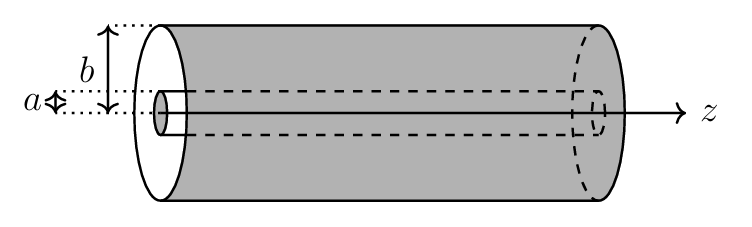



### Solution (I think...)
So I recorded a short audio clip of the explanation for this one so I think I can do it. I wanted to really force myself to dive into the book and whatever notes I have. Without further adue, here I go: 

Ill start with what I learned from the audio clip. So we can use Ampere's Law for this problem and there will be a magnetic field that is going through a rectangular area. This area is a rectangle with with a height from (a to b) and a length l along the section of the conductor we are focusing on. This means that for the (da) term in the equation, it will be $l \cdot dr$. I also now know that since the magnetic field is curling around the area inside of b and outside of a, then the flux is going to be perpendicular to the rectangular area we are looking at. 

After looking throught the book I decided I didn't want to use Ampere's Law to try this. If I end up being wrong about my answer then I'll give it a try, but I couldn't make the connection between the equations. 

From the book, the capacitance (C) is: $$C = \frac{Q}{V}$$
So lets place a positive charge (+q) on the inner cylinder and a negative charge (-q) on the outer one. What we need to do is define our electric field in cylindrical coordinates and find the electric potential (V) based on that. Q can be thought of as the total charge. After some digging, I found example problem 2.4 in Griffiths 4th Edition. It found that the enclosed charge inside of a gaussian cylinder of length (l) and radius(s) (in this case we use r) is: $$Q_{enc} = \int \rho \, d\tau = \frac{2}{3}\pi k l r^{3}$$
For later reference, the charge density is proportional to the distance from the axis $\rho = k r$. 

After doing some critical thinking on how the E field will behave, we find that it points in the direction of r (parallel). Finally we can determine that the electric field of a gaussian cylinder is: $$E = \frac{1}{3\epsilon_{0}}k r^{2}\hat{r}$$

We have a problem with this though. We need the electric field that is between a and b. What we have right now is between the radius of the a cylinder to b. So the total inner volume of both cylinders. What we can do is redo these equations from 0 to just a then subtract it from the equations above which are from 0 to b. Cue the elevator music while I try to work this out. 

Okay so what I came up with for the enclosed charge is $$Q_{enc} = \int \rho \, d\tau = \frac{2}{3}\pi k l (b - a)^{3}$$

The electric field would then be $$E = \frac{1}{3\epsilon_{0}}k (b - a)^{2}\hat{r}$$

Now we have both $Q_{enc}$ & $E$. Now we can work on finding V. From the definition of the electric potential: $$V = -\oint_{a}^{b} E \, \cdot da$$

______________________________________________________________________________________
Okay it turns out I did this totally wrong. I also forgot to use $\epsilon$. So the method is correct but the equations are wrong. Youtube is amazing if you know what to type in the search bar. So we begin with Guass' Law: $$\oint E \cdot da = \frac{Q_{enc}}{\epsilon}$$
In cylindrical coordinates the electric field will be $E(2\pi rL)$. We can also write $Q_{enc}$ as $QL$. Once we do some algebra and get the electric field isolated the equation becomes: $$E(s) = \frac{Q}{2\pi \epsilon r}$$
So now that we have the electric field we can start to unravel the potential difference: $$V = \int_{a}^{b} E(r) \, dr = \int_{a}^{b} \frac{Q}{2\pi \epsilon r} \, dr$$
After integration: $$V = \frac{Q}{2\pi \epsilon} ln(\frac{b}{a})$$
So now that we have the potential difference and we know that $Q = qL$ which is just the charge per unit length, we can finally get the capacitance per unit length. This took some algebra, but trust me here: $$\frac{C}{L} = \frac{2\pi \epsilon}{ln(\frac{b}{a})}$$

It was about this point where I found out where this problem was going. We are connecting the Capacitance and inductance and will end up finding out the speed of light. Anyways lets get on with the inductance (correctly). 

This is the part of the problem that uses Ampere's Law. Originally I was trying to connect it to the electric field and was confused. Amperes Law is: $$\oint B \cdot \, dl = \mu I_{enc}$$
This means that the magnitude of the magnetic field is equal to the permiability of free space times the enclosed current. Using cylindrical coordinates we can do this in a similar fashion regarding the electric field: $$B(s) = \frac{\mu I}{2\pi r}$$
Once again the audio recording reminded me that the area element of the flux da will become $L \cdot dr$. Knowing this we can use the flux to find the inductance. I will use lowercase l for the length term. Inductance in relation to the flux and current is: $$L = \frac{\Phi}{I}$$

Using the equation for the flux: $$\Phi = \int B \cdot\, dA$$
We can then plug in what we know: $$\Phi = \int_{a}^{b} (\frac{\mu I}{2\pi r})\, (ldr)$$
After integration we have $$\Phi = \frac{\mu I l}{2\pi} ln(\frac{b}{a})$$

The inductance is simply what we got above for the flux over the enclosed current. I'm trying to save time, but after some algebra to get the length to the other side of the equation we get inductance per unit length as: $$\frac{L}{l} = \frac{\mu}{2\pi}ln(\frac{b}{a})$$

The speed of light thing that I figured out when researching was that $$LC = \mu \epsilon$$
We can now relate capacitance and inductance to the speed of light which is $$v = \frac{1}{\sqrt{\mu \epsilon}}$$

## Problem 5:
In calculating the current enclosed by an Amperian loop, one must, in general, evaluate an integral of the form
$$I_{\text{enc}} = \int_S \mathbf{J} \cdot d\mathbf{a}.$$
The trouble is, there are infinitely many surfaces that share the same boundary line. Which one are we supposed to use?

Initially I would have said the edge of the boundary line. This is a bit too simple. If we have a ring or like a plastic tube that connects to itself then we have our amperian loop. The boundary conditions require the enclose current to flow through this loop. If we can take a slice of the loop in one place and integrate the volume current density in that spot then we know the enclosed current there. The thing is for electrostatics there is no change in things with respect to time. This means that it does not matter which surface you use really. the ideal surface to do it on is the circular slice that we made. 

What this problem is hinting at is Maxwell's correction to Ampere's Law. We haven't gotten to that yet, but its a hint at the future of this class. His change was to account for charges piling up inside the loop. This is the displacement current or $\frac{\partial E}{\partial t}$. 